# Ambiguous map patterns from stratigraphy

In [1]:
# some imports, using verde to grid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import verde as vd

%matplotlib inline

## Here we make some data with angular unconformity and onlap

In [2]:
names = [
    "one",
    "two",
    "three",
    "four",
    "five",
    "six",
    "seven",
    "eight",
    "nine",
    "ten",
    "eleven",
    "twelve",
    "thirteen",
    "fourteen",
    "fifteen",
    "sixteen",
]  # this creates dummy names for the formations
number_of_layers = (
    6
)  # this is the number of tops you want in your training data

# this section builds some toy data with an angular unconformity

df = pd.DataFrame()
for j in np.arange(-5, 7, 2):
    rolling = pd.DataFrame()
    rolling["zero"] = (
        10 * np.sin(1 - np.arange(0, 40, 0.1) / 15.28)
        + np.random.rand(400) / 100
    )
    for i in range(len(names[0:number_of_layers])):
        layer_elevation = 10 * np.sin(
            1 - np.arange(0, 40, 0.1) / 15.28
        ) + np.random.uniform(0, j)
        elevation = np.full(400, j) + np.random.rand(400) / 100
        layer_elevation = (
            np.where(layer_elevation > elevation, elevation, layer_elevation)
            + np.random.rand(400) / 100
        )
        rolling[names[i]] = layer_elevation
    x = np.arange(0, 40, 0.1)
    y = np.random.randint(0, 90, len(x))
    rolling["ex"] = x
    rolling["ey"] = y
    df = pd.concat((df, rolling))
adec = []
for i in range(len(df)):
    adec.append(df.iloc[i, 1:-2].sort_values()[0:].values)
s3 = pd.DataFrame(adec)
s3.index = df.index.values
angular_thicknesses = s3.diff(axis=1)


# now for onlap training data construction
df_onlap = pd.DataFrame()
for j in np.arange(-5, 10, 2):
    rolling = pd.DataFrame()
    rolling["zero"] = 10 * np.sin(1 - np.arange(0, 40, 0.1) / 15.28)
    for i in range(len(names[0:number_of_layers])):
        zero = (
            10 * np.sin(1 - np.arange(0, 40, 0.1) / 15.28)
            + np.random.rand(400) / 100
        )
        randomness = np.random.uniform(0, j)
        elevation = np.full(400, j) + np.random.rand(400) / 100
        onlap = np.where(
            np.full(400, randomness) > zero,
            np.full(400, randomness) + np.random.rand(400) / 100,
            zero,
        )
        layer_elevation = np.where(onlap > elevation, elevation, onlap)
        rolling[names[i]] = layer_elevation - np.arange(0, 10, 0.025)
    x = np.arange(0, 40, 0.1)
    y = np.random.randint(0, 90, len(x))
    rolling["ex"] = x
    rolling["ey"] = y
    df_onlap = pd.concat((df_onlap, rolling))
dec = []
for i in range(len(df_onlap)):
    dec.append(df_onlap.iloc[i, 1:-2].sort_values()[0:].values)
s = pd.DataFrame(dec)
s.index = df_onlap.index.values
onlap_thicknesses = s.diff(axis=1)

### This is what the data looks like in cross section

Text(0.5, 1.0, 'B')

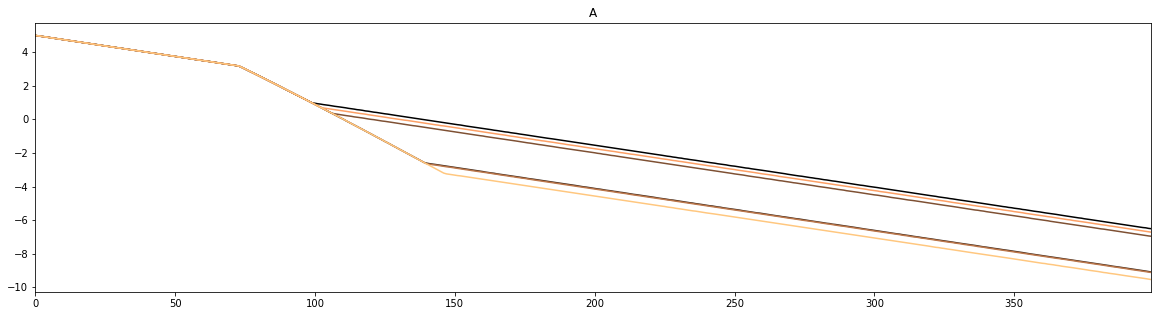

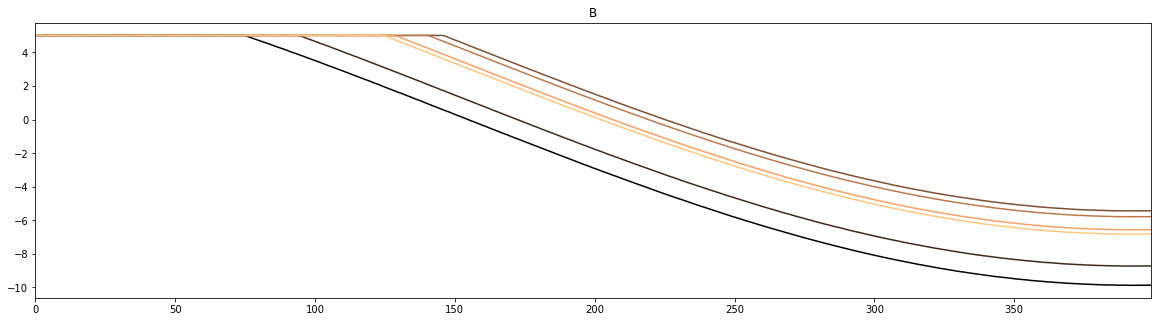

In [3]:
df_onlap.iloc[2000:2400, 1:-2].plot(
    legend=False, figsize=(20, 10), cmap="copper"
).set_aspect(6)
plt.title("A")
df.iloc[2000:2400, 1:-2].plot(
    legend=False, figsize=(20, 10), cmap="copper"
).set_aspect(
    6
)  # each x-section is 400 points long
plt.title("B")

# df_horizontal.iloc[400:800, 0:-2].plot(legend=False, figsize=(20,10), cmap='copper').set_aspect(6)

## now let's grid the data using Verde and plot it up

Text(0.5, 1.0, 'Angular Unconformity Isochore')

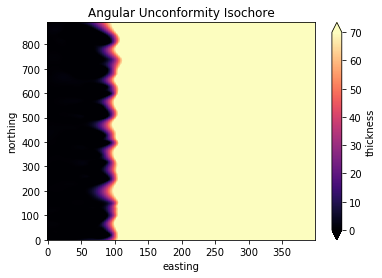

In [94]:
spline = vd.Spline()
spline.fit(
    (df.iloc[2000:2400, -2]*10, df.iloc[2000:2400, -1]*10),
    angular_thicknesses.iloc[2000:2400, 2]*100,
)
AUIgrid = spline.grid(spacing=1, data_names=["thickness"])
AUIgrid.thickness.plot.pcolormesh(cmap="magma", vmin=0, vmax=70)
plt.title("Angular Unconformity Isochore")

Text(0.5, 1.0, 'Angular Unconformity Structure')

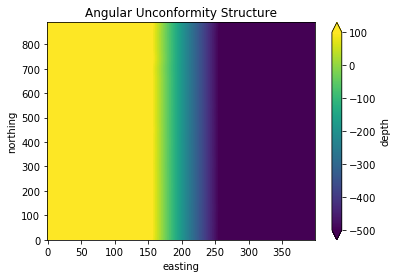

In [95]:
spline = vd.Spline()
spline.fit(
    (df.iloc[2000:2400, -2]*10, df.iloc[2000:2400, -1]*10), df.iloc[2000:2400, 2]*100
)
AUSgrid = spline.grid(spacing=1, data_names=["depth"])
AUSgrid.depth.plot.pcolormesh(cmap="viridis", vmin=100, vmax=-500)
plt.title("Angular Unconformity Structure")

Text(0.5, 1.0, 'Onlap Isochore')

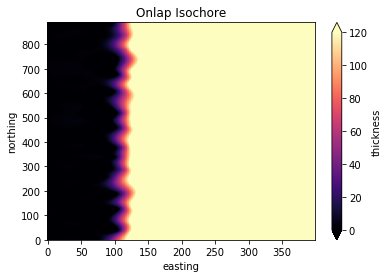

In [96]:
spline = vd.Spline()
spline.fit(
    (df_onlap.iloc[2000:2400, -2]*10, df_onlap.iloc[2000:2400, -1]*10),
    onlap_thicknesses.iloc[2000:2400, 3]*100,
)
OLIgrid = spline.grid(spacing=1, data_names=["thickness"])
OLIgrid.thickness.plot.pcolormesh(cmap="magma", vmin=0, vmax=120)
plt.title("Onlap Isochore")

Text(0.5, 1.0, 'Onlap Structure')

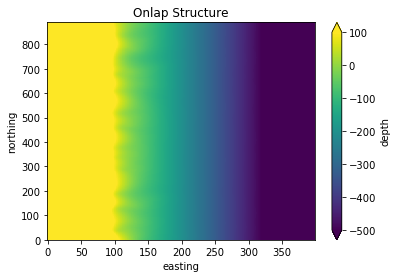

In [97]:
spline.fit(
    (df_onlap.iloc[2000:2400, -2]*10, df_onlap.iloc[2000:2400, -1]*10),
    df_onlap.iloc[2000:2400, 3]*100,
)
OLSgrid = spline.grid(spacing=1, data_names=["depth"])
OLSgrid.depth.plot.pcolormesh(cmap="viridis", vmin=100, vmax=-500)
plt.title("Onlap Structure")

### we can decimate the data to see what it would look like with fewer 'wells' in the cross section

In [98]:
decimate_onl = df_onlap.iloc[2000:2400].sample(
    frac=0.9
)  # fraction is the percentage of the data you want to sample ie-0.9 means sample 90% of the data

Text(0.5, 1.0, 'A.')

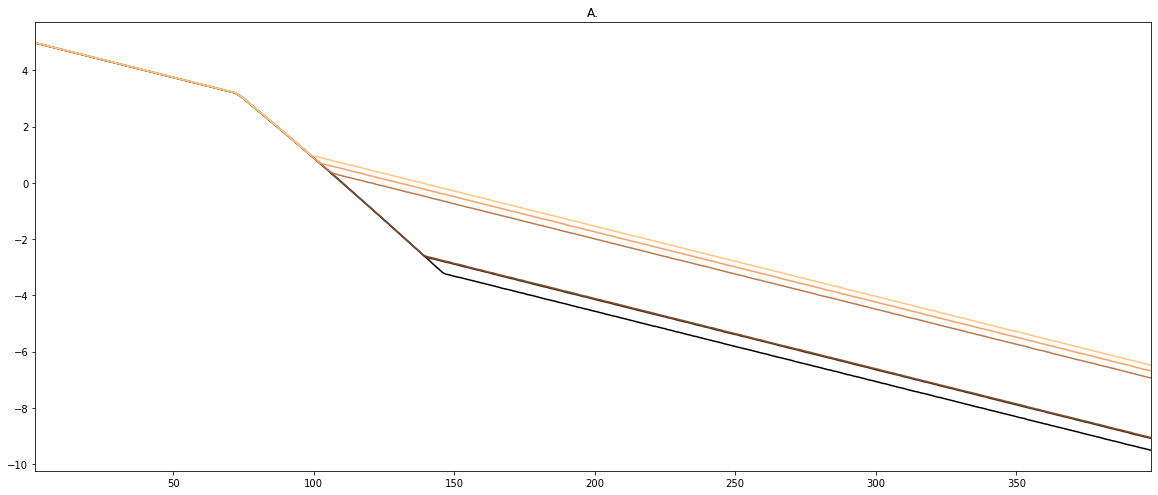

In [99]:
dec = []
for i in range(len(decimate_onl)):
    dec.append(
        decimate_onl.sort_index().iloc[i, 1:-2].sort_values()[0:6].values
    )
s2 = pd.DataFrame(dec)
s2.index = decimate_onl.sort_index().index.values
s2.plot(legend=False, figsize=(20, 10), cmap="copper").set_aspect(10)
plt.title("A.")

In [100]:
decimate_ang = df.iloc[2000:2400].loc[s2.diff(axis=1).index.values]

Text(0.5, 1.0, 'B.')

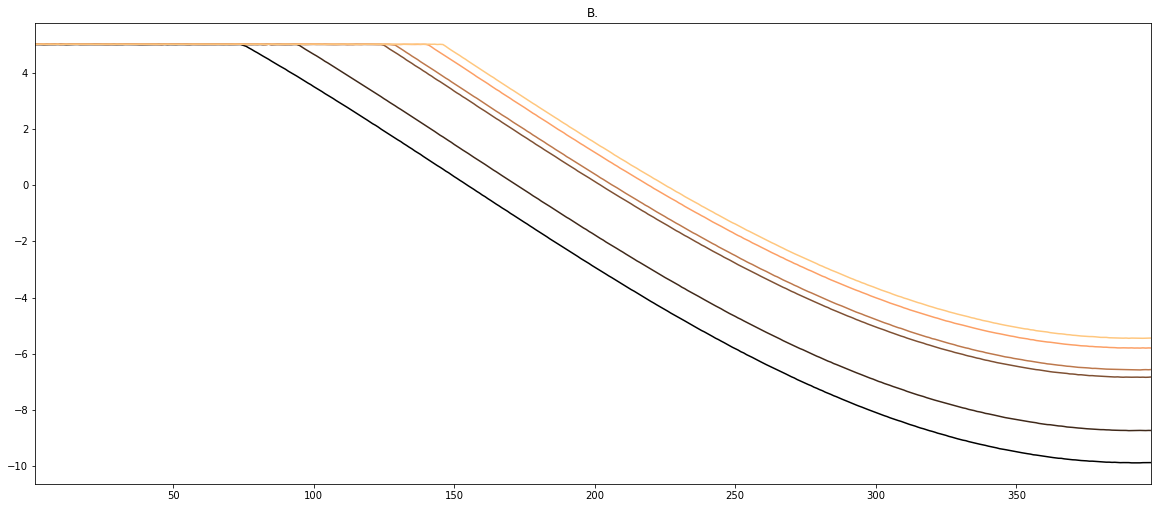

In [101]:
adec = []
for i in range(len(decimate_ang)):
    adec.append(
        decimate_ang.sort_index().iloc[i, 1:-2].sort_values()[0:6].values
    )
s3 = pd.DataFrame(adec)
s3.index = decimate_ang.sort_index().index.values
s3.plot(legend=False, figsize=(20, 10), cmap="copper").set_aspect(10)
plt.title("B.")

Text(0.5, 1.0, 'Cross Section')

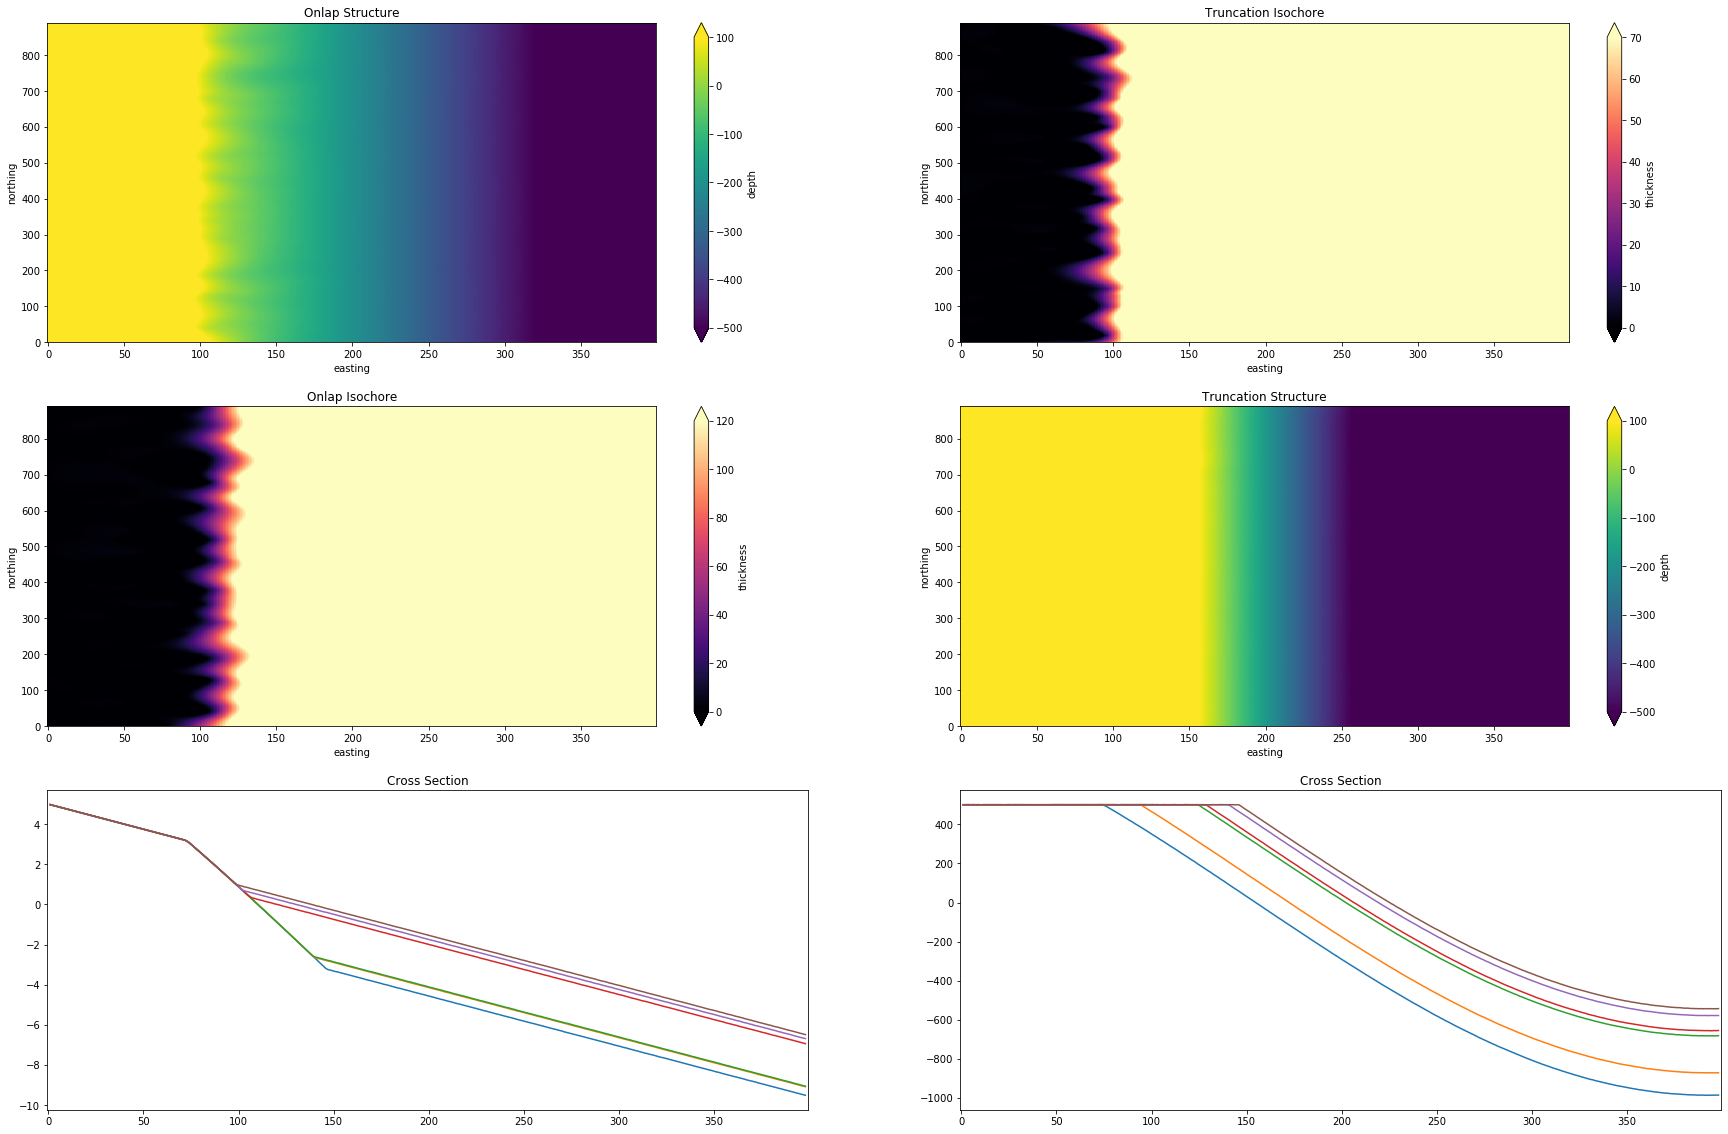

In [102]:
plt.figure(figsize=(30,20))
ax1 = plt.subplot(321)
OLSgrid.depth.plot.pcolormesh(cmap="viridis", vmin=100, vmax=-500)
plt.title("Onlap Structure")


plt.subplot(322, sharex = ax1)
AUIgrid.thickness.plot.pcolormesh(cmap="magma", vmin=0, vmax=70)
plt.title("Truncation Isochore")


plt.subplot(323, sharex = ax1)
OLIgrid.thickness.plot.pcolormesh(cmap="magma", vmin=0, vmax=120)
plt.title("Onlap Isochore")

plt.subplot(324, sharex = ax1)
AUSgrid.depth.plot.pcolormesh(cmap="viridis", vmin=100, vmax=-500)
plt.title("Truncation Structure")

plt.subplot(325, sharex = ax1)
plt.plot(s2)
plt.title("Cross Section")

plt.subplot(326, sharex = ax1)
plt.plot(s3*100)
plt.title("Cross Section")



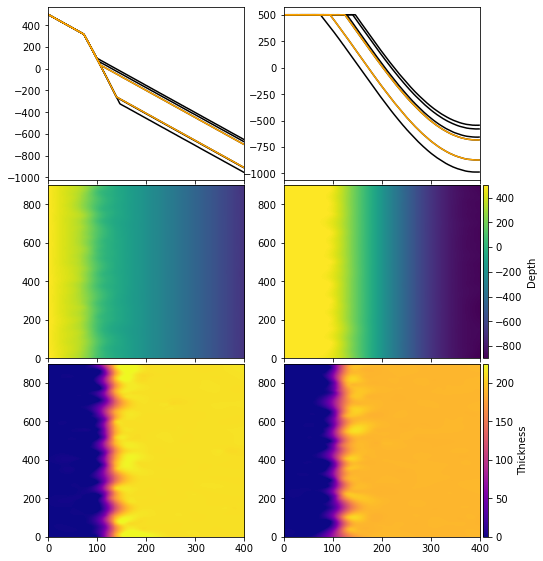

In [125]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(20,25))
fig.set_size_inches(7.5, 9.75)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.03)

axes[0,0].plot(s2*100, c='black')
axes[0,0].plot(s2[3]*100, c='orange')
axes[0,0].plot(s2[2]*100, c='orange')

axes[0,1].plot(s3*100, c='black')
axes[0,1].plot(s3[2]*100, c='orange')
axes[0,1].plot(s3[1]*100, c='orange')

im0 = axes[1,0].imshow(OLSgrid.depth, extent=[0, 400, 0, 900], aspect='auto', cmap='viridis', vmin=-900, vmax=500)

im1 = axes[1,1].imshow(AUSgrid.depth, extent=[0, 400, 0, 900], aspect='auto', cmap='viridis', vmin=-900, vmax=500)

im2 = axes[2,0].imshow(OLIgrid.thickness, extent=[0, 400, 0, 900], aspect='auto', cmap='plasma', vmin=0, vmax=225)

im3 = axes[2,1].imshow(AUIgrid.thickness, extent=[0, 400, 0, 900], aspect='auto', cmap='plasma', vmin=0, vmax=225)

fig.subplots_adjust(left=0.07, right=0.87)
# Add the colorbar outside...
box = axes[1,1].get_position()
pad, width = 0.005, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
fig.colorbar(im0, cax=cax, label='Depth')

'''
box = axes[1,0].get_position()
pad, width = 0.005, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
fig.colorbar(im1, cax=cax, label='Depth')

box = axes[2,0].get_position()
pad, width = 0.005, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
fig.colorbar(im2, cax=cax, label='Thickness')
'''
box = axes[2,1].get_position()
pad, width = 0.005, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
fig.colorbar(im3, cax=cax, label='Thickness')

fig.savefig('figure2.pdf')